In [62]:
import numpy as np 
import pandas as pd 

In [69]:
feature_vector = np.load("ICCABS/Code/kmers_10k/Reduced_Frequency_Vector_kmers.npy",allow_pickle=True)
# feature_vector = np.load("ICCABS/Code/minimizer_10k/Reduced_Frequency_Vector_minimizers.npy",allow_pickle=True)
# feature_vector = np.load("ICCABS/Code/One_Hot_10k/data/Reduced_Frequency_Vector_One_Hot.npy",allow_pickle=True)
attributes = np.load("ICCABS/Code/Reduced_Variants.npy",allow_pickle=True)

In [70]:
X = feature_vector[:]
encoded_sequences = feature_vector[:]
X.shape

(6812, 15625)

In [71]:
variants_name = attributes[:]

In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(encoded_sequences)
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)






In [73]:
# np.save("/ICCABS/Results/X_embedded_orig_tsne_One_Hot.npy", X_embedded_orig)
# X_embedded_orig = np.load("/ICCABS/Results/X_embedded_orig_tsne_One_Hot.npy",allow_pickle=True)

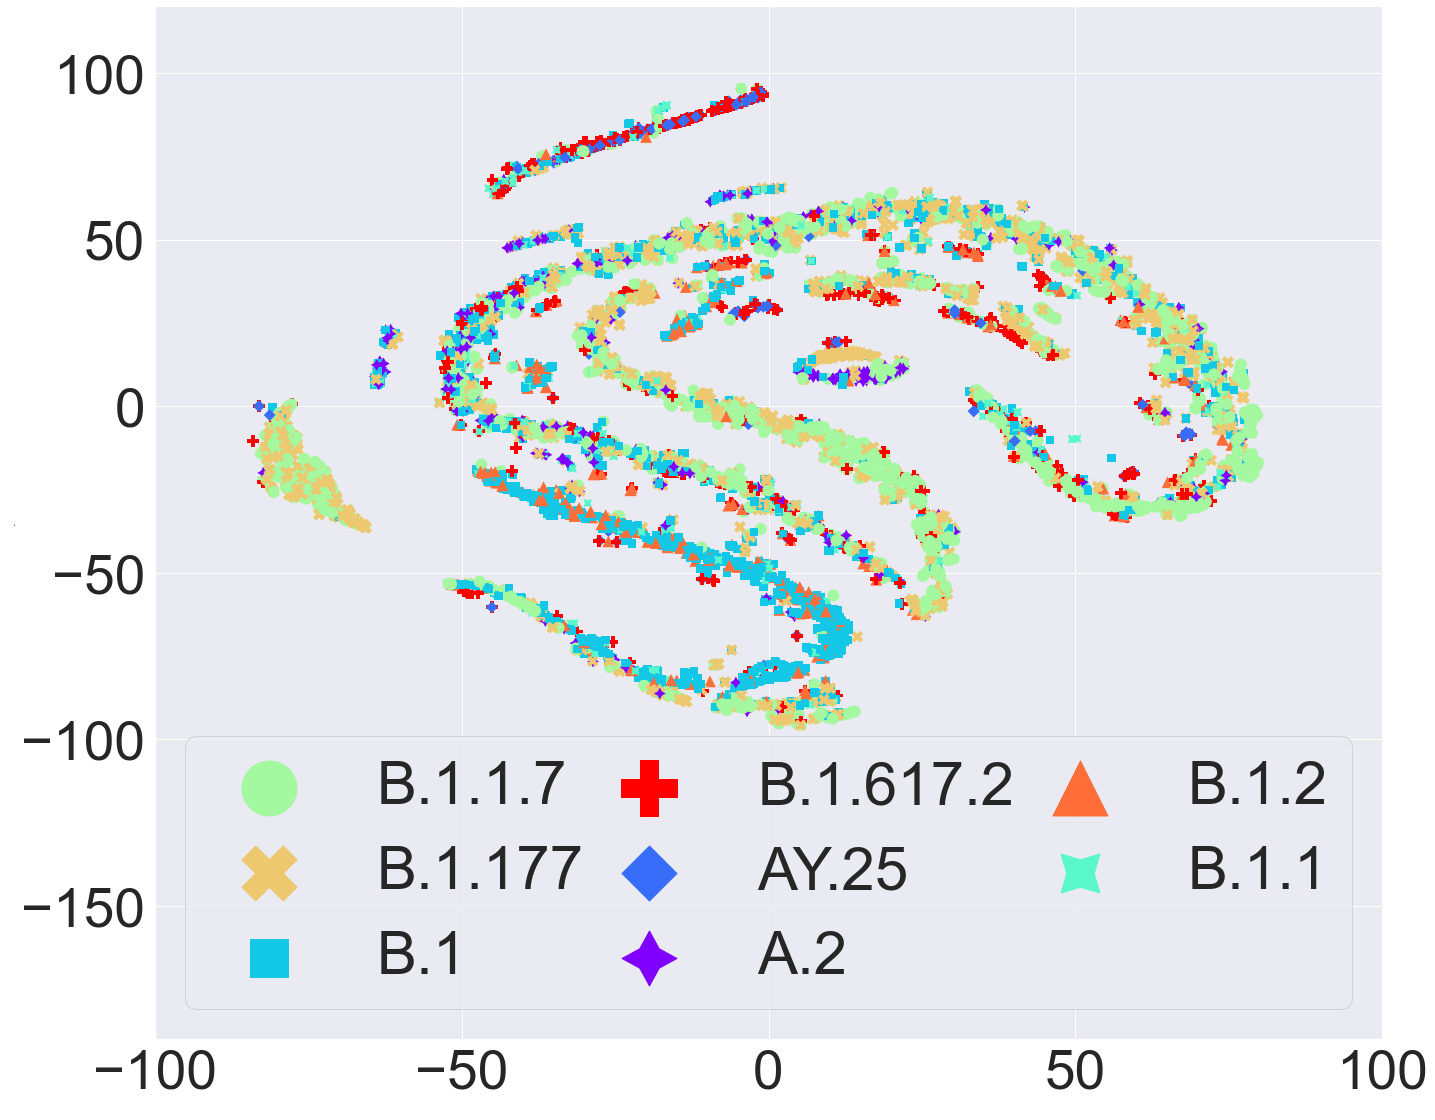

In [74]:
# az = host_names_new
az = variants_name[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4],
hst[5]:colors[5],
hst[6]:colors[6],
hst[7]:colors[7]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(22,19)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
            s = 140,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-190, 120)
plt.xlim(-100, 100)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=55)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=60, mode = "expand", ncol = 3)
for handle in lgnd.legendHandles:
    handle.set_sizes([3026.0])

write_path = "kmer_tsne_plot_6812.png"

plt.savefig(write_path)